In [1]:
import pandas as pd
import numpy as np

# Importação dos dataframes

In [2]:
products = pd.read_json("data/products.json")
products.head()

,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


In [3]:
ratings = pd.read_json("data/ratings.json")
ratings.head()

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


# Tratamento de dados

Retirando coluna createDate da DF de avaliações. Não é do nosso interesse.

In [4]:
ratings.drop(columns= "CreateDate", axis=1, inplace=True)

Verificando a presença de valores nulos

In [5]:
ratings.isna().sum()

CustomerID    0
ProductID     0
Rate          0
dtype: int64

In [6]:
products.isna().sum()

Id           0
Name         0
UnitPrice    0
dtype: int64

Criando uma coluna de quantidade de avaliação do produto para o DF de produtos.

In [7]:
rating_count = ratings['ProductID'].value_counts().reset_index()
rating_count.columns = ['ProductID', 'rating_count']

In [8]:
products = products.merge(rating_count, left_on='Id', right_on='ProductID', how='left')

In [9]:
products.drop('ProductID', axis=1, inplace=True)

Verificando se existem valores not a number na contagem de avaliações dos produtos.

In [10]:
products['rating_count'].isna().value_counts()

rating_count
False    691
Name: count, dtype: int64

In [11]:
products.head()

,Id,Name,UnitPrice,rating_count
0,1,Build your own computer,1200.0,207
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0,204
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0,201
3,4,Apple MacBook Pro 13-inch,1800.0,184
4,5,Asus N551JK-XO076H Laptop,1500.0,198


Verificando os tipos de dados

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CustomerID  130754 non-null  int64
 1   ProductID   130754 non-null  int64
 2   Rate        130754 non-null  int64
dtypes: int64(3)
memory usage: 3.0 MB


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            691 non-null    int64  
 1   Name          691 non-null    object 
 2   UnitPrice     691 non-null    float64
 3   rating_count  691 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.7+ KB


# Anáilise Exploratória

In [14]:
products.shape

(691, 4)

In [15]:
ratings.shape

(130754, 3)

In [16]:
ratings['CustomerID'].value_counts()

CustomerID
103996    1427
103765    1366
103367    1341
103505    1303
103707    1257
          ... 
103354     100
103693     100
14486      100
103898     100
103829     100
Name: count, Length: 344, dtype: int64

<Axes: >

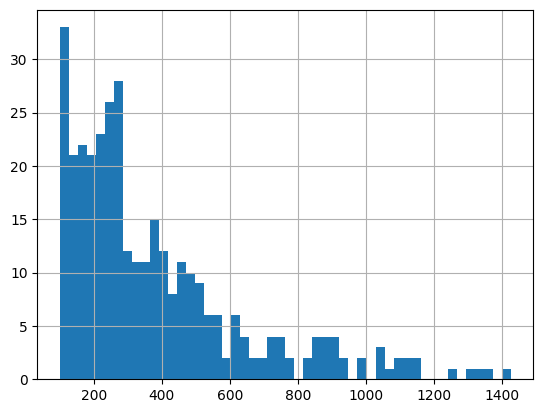

In [17]:
ratings['CustomerID'].value_counts().hist(bins=50)

# Pré processamento

In [18]:
user_most_rated = ratings['CustomerID'].value_counts() < 300
selected_users = user_most_rated[user_most_rated].index

selected_users.shape

(183,)

Visualizando id's filtrados

In [19]:
selected_users

Index([103321, 103869, 103997,  14902, 103623, 103503,  23251, 103621, 103643,
       103613,
       ...
       103717, 103348,  13885, 103351, 103521, 103354, 103693,  14486, 103898,
       103829],
      dtype='int64', name='CustomerID', length=183)

Atualizando dataframe de avaliações com os usuários que avaliaram mais de 100 vezes

In [20]:
ratings = ratings[ratings['CustomerID'].isin(selected_users)]

In [21]:
ratings.shape

(35957, 3)

Aplicando a mesma lógica aos produtos

In [22]:
products = products[products['rating_count']> 199]

products

,Id,Name,UnitPrice,rating_count
0,1,Build your own computer,1200.00,207
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.00,204
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.00,201
6,7,HP Spectre XT Pro UltraBook,1350.00,208
7,8,HP Envy 6-1180ca 15.6-Inch Sleekbook,1460.00,204
...,...,...,...,...
637,638,OPPO Reno6 Z 5G,254.00,200
647,648,Diamond Promise Ring 1/10 ct tw Baguette & Rou...,299.99,203
686,687,Bird Box,1.00,204
687,688,Snowpiercer,2.00,202


# Concatenação dos dataframes.

In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 688
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            134 non-null    int64  
 1   Name          134 non-null    object 
 2   UnitPrice     134 non-null    float64
 3   rating_count  134 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


In [24]:
products.rename(columns={"Id": "ProductID"}, inplace=True)

In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 688
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     134 non-null    int64  
 1   Name          134 non-null    object 
 2   UnitPrice     134 non-null    float64
 3   rating_count  134 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


In [26]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35957 entries, 10 to 129979
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  35957 non-null  int64
 1   ProductID   35957 non-null  int64
 2   Rate        35957 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


Concatenando dataframes com base no id dos produtos.

In [27]:
df_ratings_products = ratings.merge(products, on= 'ProductID')
df_ratings_products.head()

,CustomerID,ProductID,Rate,Name,UnitPrice,rating_count
0,103726,260,4,Men's Diamond Band 1-1/2 ct tw Round-cut 10K W...,3999.99,200
1,103894,215,4,Diamond Promise Ring 1/5 ct tw Round-cut Sterl...,289.00,201
2,103846,294,1,Le Vian Chocolate Diamond Paw Print Ring 5/8 c...,1699.99,201
3,103443,620,2,Laptop Lenovo IdeaPad Slim 3 15ALC6 R3 5300U/8...,1000.00,208
4,103909,175,2,iPhone Xs Max 64GB,1070.00,203


In [28]:
df_ratings_products.isna().sum()

CustomerID      0
ProductID       0
Rate            0
Name            0
UnitPrice       0
rating_count    0
dtype: int64

Dropando possíveis duplicatas

In [29]:
df_ratings_products.drop_duplicates(['CustomerID', 'ProductID'], inplace=True)

retirada do id do produto(Não é mais necessario, recomendação será um valor rotulado "Name")

In [30]:
df_ratings_products.drop(columns="ProductID", axis=1, inplace=True)

In [31]:
df_ratings_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7556
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    7465 non-null   int64  
 1   Rate          7465 non-null   int64  
 2   Name          7465 non-null   object 
 3   UnitPrice     7465 non-null   float64
 4   rating_count  7465 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 349.9+ KB


# Convertendo Dataframe novo para treinamento do nosso classificador

In [32]:
products_pivot = df_ratings_products.pivot_table(columns="CustomerID", index="Name", values='Rate')

In [33]:
products_pivot.head()

CustomerID,3,13885,13892,14180,14486,14902,14906,15018,15202,15221,...,103965,103967,103971,103977,103981,103983,103985,103991,103992,103997
Name,,,,,,,,,,,,,,,,,,,,,
1/6 Ct. tw Diamond Initials Couple's Heart Necklace,1.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,1.0,...,NaN,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1/8 Ct. tw Diamond Nameplate Heart Necklace,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,5.0,NaN,NaN,NaN,2.0,NaN,NaN
Amethyst & White Lab-Created Sapphire Drop Earrings 10K Rose Gold,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0
Amethyst Heart Necklace Diamond Accents Sterling Silver,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0
Aquamarine & Diamond Ring 10K White Gold,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,2.0,5.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN


Podemos ver pelo novo dataframe acima que para cada usuário temos uma coluna com suas avaliações. E cada linha representa um produto. Esses dados serão agora tratados um última vez antes de treinarmos com o KNN

Preenchendo valores nan com zero para treinamento da IA

In [34]:
products_pivot.fillna(0, inplace=True)
products_pivot.head()

CustomerID,3,13885,13892,14180,14486,14902,14906,15018,15202,15221,...,103965,103967,103971,103977,103981,103983,103985,103991,103992,103997
Name,,,,,,,,,,,,,,,,,,,,,
1/6 Ct. tw Diamond Initials Couple's Heart Necklace,1.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,...,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1/8 Ct. tw Diamond Nameplate Heart Necklace,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
Amethyst & White Lab-Created Sapphire Drop Earrings 10K Rose Gold,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Amethyst Heart Necklace Diamond Accents Sterling Silver,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0
Aquamarine & Diamond Ring 10K White Gold,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,5.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0


Para poder treinar nosso modelo, considerando que nosso conjunto de dados de treino é muito grande, teremos que compactar esse dataframe utilizando o conceito de matriz sparse. Atravéz da função csr_matrix conseguimos simplificar a extrutura do dataframe onde existem muitos zeros para poder deixa-lo mais leve.

In [35]:
from scipy.sparse import csr_matrix

In [36]:
products_sparse = csr_matrix(products_pivot)

# Treinamento do modelo

In [37]:
from sklearn.neighbors import NearestNeighbors

Criação e treino do modelo com matriz sparse

In [38]:
model1 = NearestNeighbors(algorithm='brute')

In [39]:
model1.fit(products_sparse)

NearestNeighbors(algorithm='brute')

# Fazendo previsões

In [47]:
distance, sugest = model1.kneighbors(products_pivot.filter(items= ["Laptop Lenovo IdeaPad Slim 3 15ALC6 R3 5300U/8GB/512GB/15.6''FHD/Win 11"], axis=0).values.reshape(1, -1))

In [48]:
for i in range(len(sugest)):
    print("Recomendação: " + products_pivot.index[sugest[i]])

Index(['Recomendação: Laptop Lenovo IdeaPad Slim 3 15ALC6 R3 5300U/8GB/512GB/15.6''FHD/Win 11',
       'Recomendação: Curb Link Necklace 10K Two-Tone Gold 22" Length',
       'Recomendação: Digital Storm VANQUISH 3 Custom Performance PC',
       'Recomendação: Bird Box', 'Recomendação: Xiaomi Redmi Go'],
      dtype='object', name='Name')


In [58]:
distance, sugest = model1.kneighbors(products_pivot.filter(items= ["Diamond Promise Ring 1/5 ct tw Round-cut Sterling Silver"], axis=0).values.reshape(1, -1))

In [59]:
for i in range(len(sugest)):
    print("Recomendação: " + products_pivot.index[sugest[i]])

Index(['Recomendação: Diamond Promise Ring 1/5 ct tw Round-cut Sterling Silver',
       'Recomendação: Open Tube Twist Hoop Earrings 10K Yellow Gold',
       'Recomendação: Diamond Promise Ring 1/4 ct tw Round-cut Sterling Silver',
       'Recomendação: Forever Connected Diamond Heart Necklace 1/4 ct tw Pear & Round-cut 10K White Gold 18"',
       'Recomendação: Cultured Pearl Necklace 1/15 ct tw Diamonds 14K Yellow Gold 17"'],
      dtype='object', name='Name')
